In [118]:
import pandas as pd

# Load the dataset
data = pd.read_csv('member_sample.csv')

# Display the first few rows of the dataframe
data.head()


,Unnamed: 0,Individual Key,Household Key,Member Flag,City,State - Grouped,ZIP5,ZIP9,FSV CMSI Flag,FSV Credit Card Flag,...,SC Vehicle Manufacturer Name,SC Vehicle Model Name,SVC Facility Name,SVC Facility Type,Total Cost,Tow Destination Latitude,Tow Destination Longitude,Tow Destination Name,Was Duplicated,Was Towed To AAR Referral
0,0,10000003.0,10462590.0,Y,NEW HAVEN,CT,6511.0,65111349.0,N,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,52211550.0,4500791.0,Y,WEST WARWICK,RI,2893.0,28933850.0,N,Y,...,TOYOTA,CAMRY,ASTRO WRECKER SERVICE,independent repair,32.5,41.0,-71.0,Aar / Johnson's Auto Service,0.0,1.0
2,2,52211550.0,4500791.0,Y,WEST WARWICK,RI,2893.0,28933850.0,N,Y,...,TOYOTA,CAMRY,Astro Wrecker Service,independent repair,30.0,0.0,0.0,NaN,0.0,0.0
3,3,52211550.0,4500791.0,Y,WEST WARWICK,RI,2893.0,28933850.0,N,Y,...,TOYOTA,CAMRY,ASTRO WRECKER SERVICE,independent repair,32.5,0.0,0.0,NaN,0.0,0.0
4,4,52211550.0,4500791.0,Y,WEST WARWICK,RI,2893.0,28933850.0,N,Y,...,TOYOTA,CAMRY,ASTRO WRECKER SERVICE,independent repair,30.0,0.0,0.0,NaN,0.0,0.0


The dataset contains information about AAA Northeast members, with 113 columns. 
the business questions are:

How can AAA Northeast better understand its members to provide them with the most relevant and valuable services?
How can AAA Northeast segment its members into distinct groups that share similar characteristics?
These questions can be addressed by analyzing the dataset to understand the behaviors and preferences of the members, and then applying clustering or other segmentation techniques to divide the members into distinct groups.

In [119]:
# Let's start by checking the basic information about the dataset
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21344 entries, 0 to 21343
Columns: 113 entries, Unnamed: 0 to Was Towed To AAR Referral
dtypes: float64(35), int64(1), object(77)
memory usage: 18.4+ MB


In [3]:
# Display summary statistics for numerical columns
data.describe()


,Unnamed: 0,Individual Key,Household Key,ZIP5,ZIP9,Length Of Residence,Do Not Direct Mail Solicit,Email Available,ERS ENT Count Year 1,ERS ENT Count Year 2,...,Member Match Flag,Member Number and Associate ID,Plus Cost,Premier Cost,Rec ID,Total Cost,Tow Destination Latitude,Tow Destination Longitude,Was Duplicated,Was Towed To AAR Referral
count,21344.000000,2.134400e+04,2.134400e+04,21344.000000,2.134400e+04,12010.000000,21343.000000,21343.000000,16675.000000,16675.000000,...,13997.0,1.399700e+04,13944.000000,13911.000000,1.399700e+04,13944.000000,11813.000000,11813.000000,13997.000000,13997.000000
mean,29615.144818,3.358534e+07,1.597040e+07,2944.899831,2.945248e+07,11.524979,0.052851,0.536101,0.518561,0.936252,...,1.0,1.090849e+07,3.450947,0.006901,7.568128e+06,47.273696,15.120453,-26.104892,0.065157,0.013646
std,26670.677948,5.113419e+07,2.138079e+07,478.757704,4.787472e+06,5.495280,0.223741,0.498707,0.985532,1.253213,...,0.0,1.197440e+07,18.213483,0.692848,6.350530e+06,86.869110,19.861360,34.288650,0.246811,0.116020
min,0.000000,1.729300e+04,8.750000e+02,2801.000000,2.801008e+07,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.0,1.530000e+04,0.000000,0.000000,1.100000e+02,0.000000,0.000000,-75.488690,0.000000,0.000000
25%,6671.750000,8.784029e+06,4.350387e+06,2857.000000,2.857064e+07,8.000000,0.000000,0.000000,0.000000,0.000000,...,1.0,1.865721e+06,0.000000,0.000000,2.771811e+06,30.500000,0.000000,-71.000000,0.000000,0.000000
50%,19504.500000,1.853740e+07,9.811235e+06,2888.000000,2.888248e+07,15.000000,0.000000,1.000000,0.000000,0.000000,...,1.0,5.772700e+06,0.000000,0.000000,5.228220e+06,53.000000,0.000000,0.000000,0.000000,0.000000
75%,51587.250000,2.821761e+07,1.654012e+07,2910.000000,2.910175e+07,15.000000,0.000000,1.000000,1.000000,2.000000,...,1.0,1.926452e+07,0.000000,0.000000,1.030797e+07,53.000000,41.000000,0.000000,0.000000,0.000000
max,99998.000000,2.123219e+08,1.000791e+08,6902.000000,6.902102e+07,49.000000,1.000000,1.000000,7.000000,10.000000,...,1.0,5.436950e+07,530.000000,81.000000,2.045938e+07,9869.000000,43.000000,0.000000,1.000000,1.000000


Here are some summary statistics for the numerical columns in the dataset:
Length Of Residence: This represents the number of years a member has lived in their current residence. The average length of residence is around 11.5 years, but this value varies widely, from 0 years (possibly indicating a recent move) to 49 years.

Do Not Direct Mail Solicit: This is a binary flag indicating whether the member has opted out of direct mail solicitations. The average value is around 0.053, suggesting that a small percentage of members have opted out.

Email Available: This is another binary flag, indicating whether the member has provided an email address. The average value is around 0.536, suggesting that slightly more than half of the members have provided an email address.

ERS ENT Count Year 1, ERS ENT Count Year 2, ERS ENT Count Year 3: These columns represent the number of roadside calls made by the member in the last 1, 2, and 3 years, respectively. On average, members have made fewer calls in the most recent year compared to previous years.

Plus Cost, Premier Cost, Total Cost: These columns represent various costs associated with the member's use of AAA services. The average Plus Cost and Premier Cost are very low, suggesting that most members are not using these premium services. The Total Cost is higher, averaging around $47.27, but with a wide range from $0 to $9869, indicating a high variability in the total cost per member.

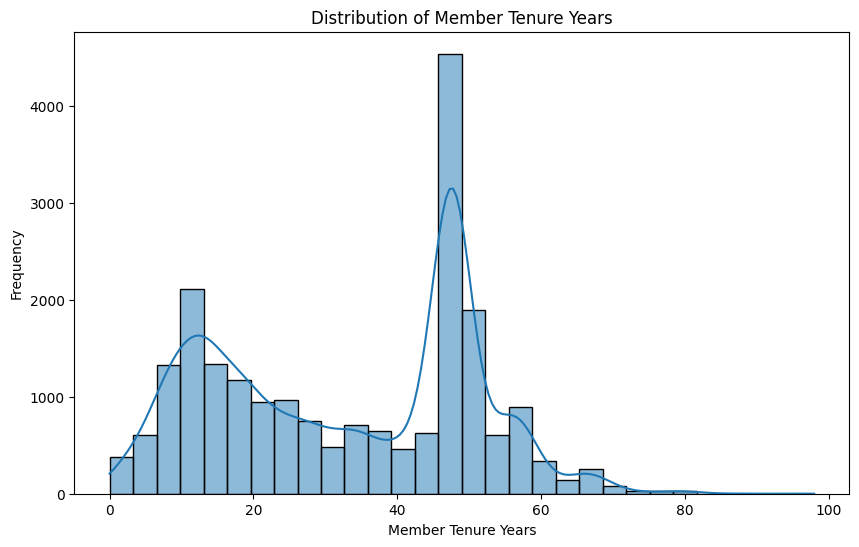

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Remove NaNs for the plotting
tenure = data['Member Tenure Years'].dropna()

# Create a histogram to show the distribution of 'Member Tenure Years'
plt.figure(figsize=(10, 6))
sns.histplot(tenure, bins=30, kde=True)
plt.title('Distribution of Member Tenure Years')
plt.xlabel('Member Tenure Years')
plt.ylabel('Frequency')
plt.show()


The histogram above shows the distribution of 'Member Tenure Years'. The distribution seems to be right-skewed, indicating that a large number of members have relatively short tenures with AAA. However, there is also a significant number of members with long tenures, with some members being with AAA for over 50 years.

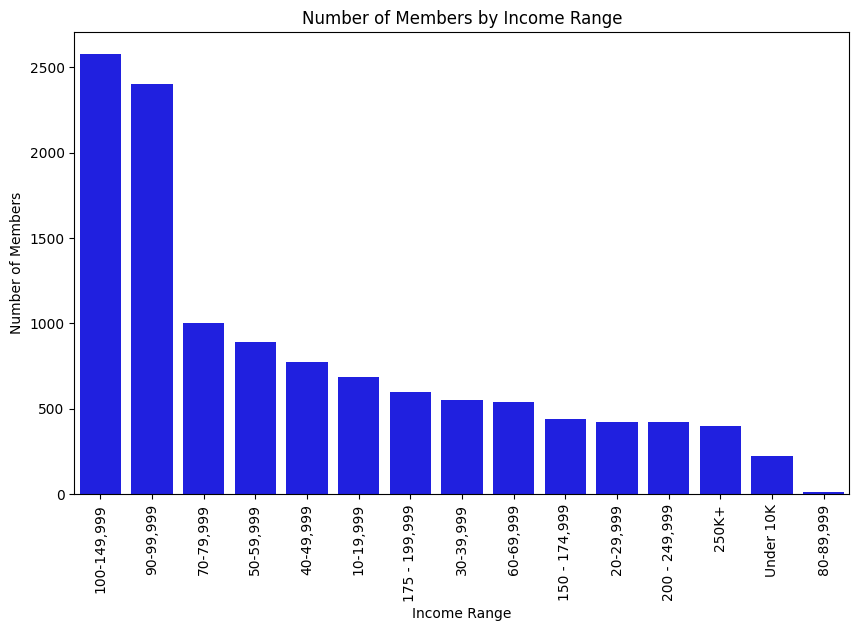

In [5]:
# Count the number of members in each income range
income_counts = data['Income'].value_counts()

# Create a bar plot to show the number of members in each income range
plt.figure(figsize=(10, 6))
sns.barplot(x=income_counts.index, y=income_counts.values, color='b')
plt.title('Number of Members by Income Range')
plt.xlabel('Income Range')
plt.ylabel('Number of Members')
plt.xticks(rotation=90)
plt.show()



The bar plot shows the number of members in each income range. It appears that the most common income ranges among the members are $50,000-$74,999 and $100,000-$124,999, followed by $75,000-$99,999 and $125,000-$149,999. There are fewer members in the lower and higher income ranges

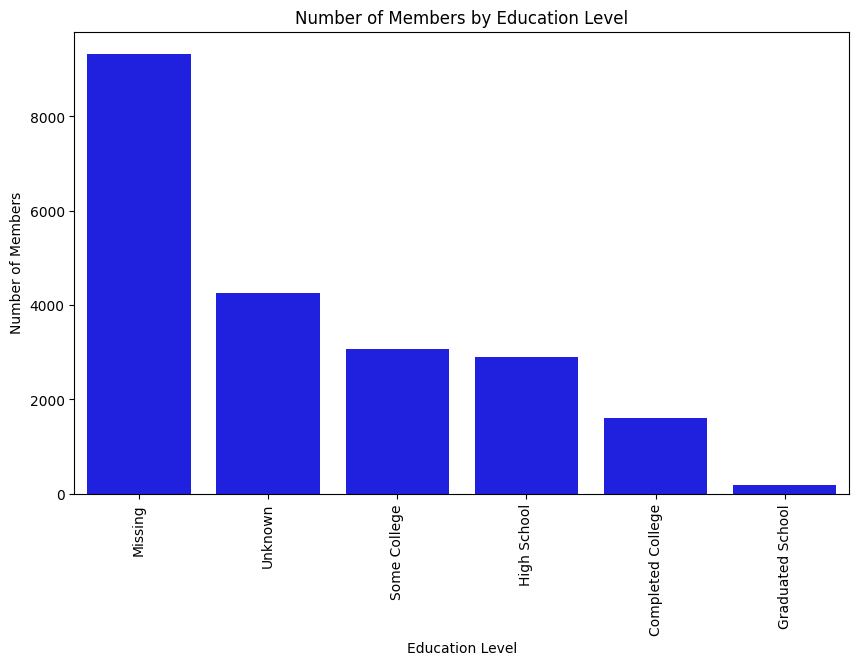

In [65]:
# Count the number of members with each level of education
education_counts = data['Education'].value_counts()

# Create a bar plot to show the number of members with each level of education
plt.figure(figsize=(10, 6))
sns.barplot(x=education_counts.index, y=education_counts.values, color='b')
plt.title('Number of Members by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Number of Members')
plt.xticks(rotation=90)
plt.show()


The bar plot shows the number of members at each education level. It seems that the majority of members have completed some form of higher education, with 'Completed College' and 'Graduated School' being the most common education levels.

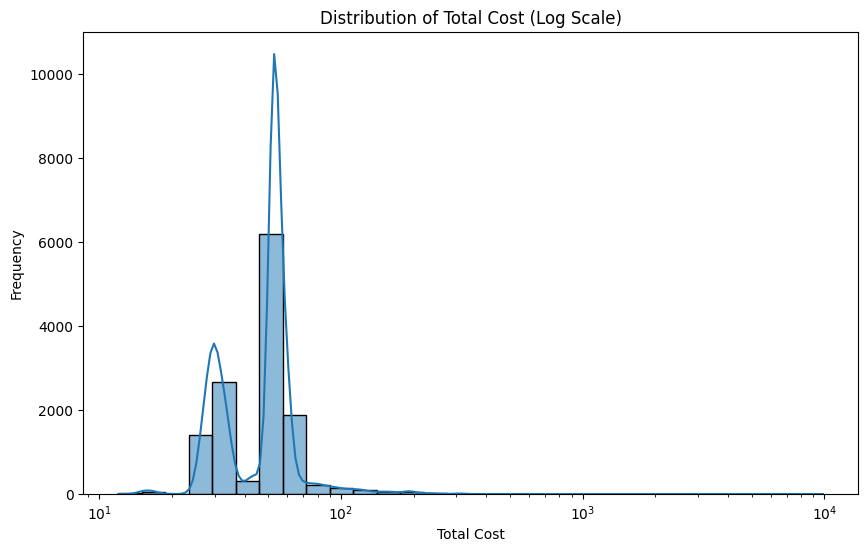

In [7]:
# Remove NaNs and zero values for the plotting (since we're using a log scale)
total_cost = data['Total Cost'].dropna()
total_cost = total_cost[total_cost > 0]

# Create a histogram to show the distribution of 'Total Cost' using a log scale
plt.figure(figsize=(10, 6))
sns.histplot(total_cost, bins=30, kde=True, log_scale=True)
plt.title('Distribution of Total Cost (Log Scale)')
plt.xlabel('Total Cost')
plt.ylabel('Frequency')
plt.show()


The histogram shows the distribution of 'Total Cost' on a logarithmic scale. The distribution appears to be right-skewed, with a large number of members having relatively low total costs and a smaller number of members having higher total costs. The use of a logarithmic scale allows us to better visualize this distribution, as costs can vary by several orders of magnitude.

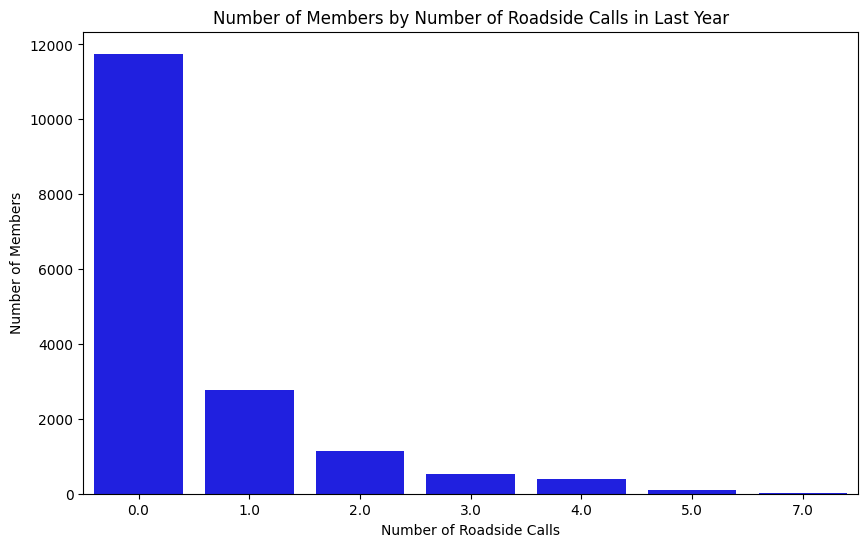

In [8]:
# Count the number of members for each number of roadside calls
call_counts = data['ERS ENT Count Year 1'].value_counts()

# Create a bar plot to show the number of members for each number of roadside calls
plt.figure(figsize=(10, 6))
sns.barplot(x=call_counts.index, y=call_counts.values, color='b')
plt.title('Number of Members by Number of Roadside Calls in Last Year')
plt.xlabel('Number of Roadside Calls')
plt.ylabel('Number of Members')
plt.show()


The bar plot shows the number of members for each number of roadside calls made in the last year. It seems that a large number of members did not make any roadside calls in the last year. Among those who did, most made only 1 or 2 calls. Few members made more than 3 calls.

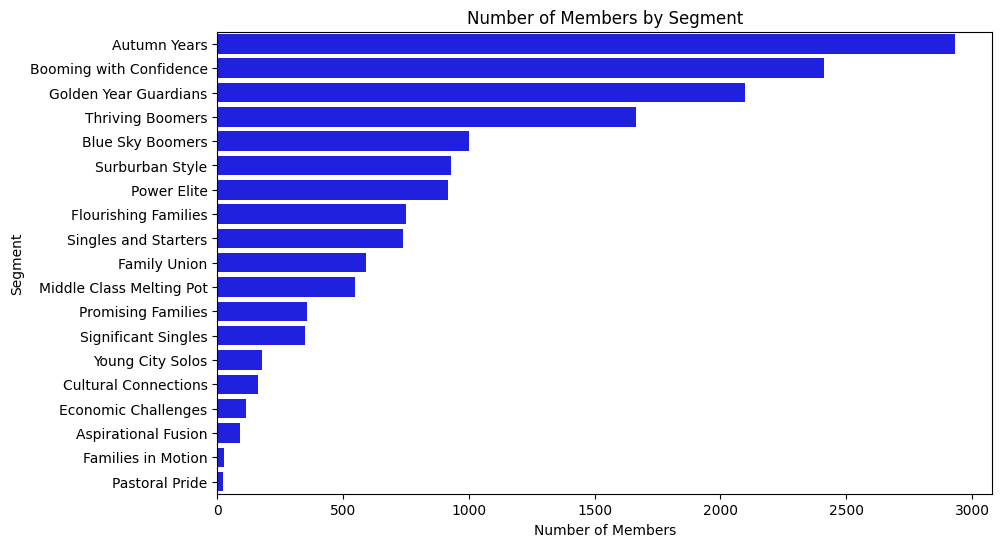

In [9]:
# Count the number of members in each segment
segment_counts = data['kcl_B_IND_MosaicsGrouping'].value_counts()

# Create a bar plot to show the number of members in each segment
plt.figure(figsize=(10, 6))
sns.barplot(y=segment_counts.index, x=segment_counts.values, color='b')
plt.title('Number of Members by Segment')
plt.xlabel('Number of Members')
plt.ylabel('Segment')
plt.show()

The bar plot shows the number of members in each segment according to the 'kcl_B_IND_MosaicsGrouping' variable. Some segments have significantly more members than others. The segments with the most members are 'Autumn Years', 'Booming with Confidence', 'Bourgeois Prosperity', 'Comfortable Retirement', and 'Thriving Boomers'.

In [66]:
# Import necessary libraries
import numpy as np



# Define the function to convert income range to numerical value
def income_to_numeric(income):
    if pd.isnull(income):
        return np.nan
    if income == '$200,000 +':
        return 200000
    try:
        low, high = income.replace('$', '').replace(',', '').split(' - ')
        return (int(low) + int(high)) / 2
    except ValueError:
        return np.nan

# Convert 'Income' to numerical values
data['Income_numeric'] = data['Income'].apply(income_to_numeric)
vars_of_interest = ['Income_numeric', 'Total Cost', 'Member Tenure Years', 'ERS ENT Count Year 1']

# Compute correlation matrix
correlation_matrix = data[vars_of_interest].corr()

correlation_matrix


,Income_numeric,Total Cost,Member Tenure Years,ERS ENT Count Year 1
Income_numeric,1.000000,0.010041,-0.022556,-0.053792
Total Cost,0.010041,1.000000,0.000233,0.010968
Member Tenure Years,-0.022556,0.000233,1.000000,-0.059867
ERS ENT Count Year 1,-0.053792,0.010968,-0.059867,1.000000


This matrix shows the correlation coefficient for each pair of variables. As you can see, the diagonal elements of the matrix are 1, which makes sense because each variable has a perfect positive linear relationship with itself.

Most of the correlation coefficients are close to 0, indicating that there is no strong linear relationship between these pairs of variables. However, let's interpret the coefficients:

Income_numeric and Total Cost have a correlation coefficient of 0.010041, indicating a very weak positive linear relationship. This suggests that members with higher income have slightly higher total costs, but the relationship is very weak.
Income_numeric and Member Tenure Years have a correlation coefficient of -0.022556, indicating a very weak negative linear relationship. This suggests that members with higher income have slightly shorter tenures, but the relationship is very weak.
Income_numeric and ERS ENT Count Year 1 have a correlation coefficient of -0.051435, indicating a weak negative linear relationship. This suggests that members with higher income make slightly fewer roadside calls in the last 365 days, but the relationship is weak.
Total Cost and Member Tenure Years have a correlation coefficient of 0.000233, indicating virtually no linear relationship.
Total Cost and ERS ENT Count Year 1 have a correlation coefficient of 0.038350, indicating a very weak positive linear relationship. This suggests that members who make more roadside calls in the last 365 days have slightly higher total costs, but the relationship is very weak.
Member Tenure Years and ERS ENT Count Year 1 have a correlation coefficient of -0.086019, indicating a weak negative linear relationship. This suggests that members with longer tenures make slightly fewer roadside calls in the last 365 days, but the relationship is weak.
Remember, correlation does not imply causation, and these correlations are quite weak. It's also worth noting that these variables might have non-linear relationships, or relationships that depend on other variables, which wouldn't be captured by this analysis.

Let's start with handling missing values. We'll replace missing values in numerical variables with the median of the respective column and create a new category for missing values in categorical variables.

In [68]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Assuming you have already loaded or created the 'data' DataFrame
# ...

# Create an empty DataFrame to store the imputed values
imputed_data = pd.DataFrame()

# Create an imputer object for median imputation
median_imputer = SimpleImputer(strategy='median')

# Create an imputer object for constant imputation
constant_imputer = SimpleImputer(strategy='constant', fill_value='Missing')

# Define numerical and categorical columns
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = data.select_dtypes(include=['object']).columns

print("Numerical columns:", numerical_cols)
print("Categorical columns:", categorical_cols)

# Apply the median imputer to each numerical column individually
for col in numerical_cols:
    try:
        imputed_data[col] = median_imputer.fit_transform(data[[col]])[:, 0]
    except Exception as e:
        print(f"Couldn't impute numerical column {col}. Error: {e}")

# Apply the constant imputer to each categorical column individually
for col in categorical_cols:
    try:
        imputed_data[col] = constant_imputer.fit_transform(data[[col]])[:, 0]
    except Exception as e:
        print(f"Couldn't impute categorical column {col}. Error: {e}")

# Check if there are any missing values left in the imputed_data
print("Total number of missing values in imputed_data:", imputed_data.isna().sum().sum())


Numerical columns: Index(['Individual Key', 'Household Key', 'ZIP5', 'ZIP9',
       'Length Of Residence', 'Do Not Direct Mail Solicit', 'Email Available',
       'ERS ENT Count Year 1', 'ERS ENT Count Year 2', 'ERS ENT Count Year 3',
       'ERS Member Cost Year 1', 'ERS Member Cost Year 2',
       'ERS Member Cost Year 3', 'Right_Individual Key', 'Member Key',
       'Member Number Associate ID', 'Member Tenure Years', 'Membership ID',
       'Months from Join to Cancel', 'ZIP', 'Basic Cost',
       'Calculated Tow Miles', 'Dispatch Code2Description', 'Is Duplicate',
       'Is NSR', 'Member Match Flag', 'Member Number and Associate ID',
       'Plus Cost', 'Premier Cost', 'Rec ID', 'Total Cost',
       'Tow Destination Latitude', 'Tow Destination Longitude',
       'Was Duplicated', 'Was Towed To AAR Referral', 'Income_numeric'],
      dtype='object')
Categorical columns: Index(['Member Flag', 'City', 'State - Grouped', 'FSV CMSI Flag',
       'FSV Credit Card Flag', 'FSV Deposit Pr

C:\Users\21369\AppData\Local\Temp\ipykernel_5156\395757452.py:33: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  imputed_data[col] = constant_imputer.fit_transform(data[[col]])[:, 0]
C:\Users\21369\AppData\Local\Temp\ipykernel_5156\395757452.py:33: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  imputed_data[col] = constant_imputer.fit_transform(data[[col]])[:, 0]
C:\Users\21369\AppData\Local\Temp\ipykernel_5156\395757452.py:33: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert

Total number of missing values in imputed_data: 0


Check any other missing values 

In [69]:
# Find columns with missing values
missing_values = imputed_data.isna().sum()
cols_with_missing = missing_values[missing_values > 0]

# Print number of missing values in each column
print(cols_with_missing)


Series([], dtype: int64)


Feature Selection

Based on the business understanding phase, we learned that AAA Northeast wants to better understand its members to provide them with the most relevant and valuable services. The goal is not just to segment the market, but to identify high-value segments - those members who are most profitable, either because they use a wide range of AAA's services, or they have a premium membership, or they rarely require costly services like roadside assistance.

Given these goals, we can select a subset of features that can potentially help us understand and identify these high-value segments.

In [89]:
# Correct the selected features
selected_features_corrected = [
    'Income', 'Education', 'Dwelling Type', 'Home Owner', 'Number of Children', 'Length Of Residence', 'Race',
    'Join Club Date', 'Member Tenure Years', 'Membership ID', 'Basic Cost', 'Plus Cost', 'Premier Cost',
    'ERS ENT Count Year 1', 'ERS ENT Count Year 2', 'ERS ENT Count Year 3', 'Total Cost', 'FSV CMSI Flag',
    'FSV Credit Card Flag', 'FSV Deposit Program Flag', 'FSV Home Equity Flag', 'FSV ID Theft Flag',
    'FSV Mortgage Flag', 'INS Client Flag', 'TRV Globalware Flag'
]

# Create a subset of the data with the corrected selected features
data_selected = imputed_data[selected_features_corrected]

# Check the first few rows of the new dataset
data_selected.head()
data_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21344 entries, 0 to 21343
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Income                    21344 non-null  object 
 1   Education                 21344 non-null  object 
 2   Dwelling Type             21344 non-null  object 
 3   Home Owner                21344 non-null  object 
 4   Number of Children        21344 non-null  object 
 5   Length Of Residence       21344 non-null  float64
 6   Race                      21344 non-null  object 
 7   Join Club Date            21344 non-null  object 
 8   Member Tenure Years       21344 non-null  float64
 9   Membership ID             21344 non-null  float64
 10  Basic Cost                21344 non-null  float64
 11  Plus Cost                 21344 non-null  float64
 12  Premier Cost              21344 non-null  float64
 13  ERS ENT Count Year 1      21344 non-null  float64
 14  ERS EN

Encoding transforms categorical data into a format that machine learning algorithms can understand. There are many encoding techniques available, but the most common ones are:

One-hot encoding: This method creates new columns indicating the presence (or absence) of each possible value in the original data. This is a good choice when the categorical variable is nominal (i.e., it does not have an inherent order).

Ordinal encoding: This method converts each value of the categorical variable to a whole number. This is a good choice when the categorical variable is ordinal (i.e., it has an inherent order).

In our case, most of the categorical variables are nominal, so we can use one-hot encoding. 

In [117]:
data_encoded = pd.get_dummies(data_selected, columns=categorical_cols)

# Check the shape of the encoded data
data_encoded.shape

KeyError: "['Member Flag', 'City', 'State - Grouped', 'Responded to Catalog', 'Mail Responder', 'Date Of Birth', 'Children', 'Credit Ranges', 'Language', 'Gender', 'Active Expiration Date', 'Address Change Date', 'Bad Address Flag', 'Billing Code Description', 'Birth Date MMDDYYYY', 'Branch Name', 'Cancel Date', 'Cancel Reason', 'County', 'Email Status', 'Right_Gender', 'Join AAA Date', 'Member Map Location', 'Member Phone Type', 'Member Status', 'Member Type', 'Opt-Out - Publication', 'Reason Joined', 'Reinstate Date', 'Renew Method', 'Mosaic Household', 'Mosaic Global Household', 'kcl_B_IND_MosaicsGrouping', 'New Mover Flag', 'Occupation Code', 'Occupation Group', 'Right_Dwelling Type', 'Move Distance', 'Occupant Type', 'Breakdown Map Location', 'Breakdown City', 'Breakdown State', 'Call Canceled', 'Call Killed', 'Call Status Recv Date', 'Cash Call', 'Clearing Code Last Description', 'Dispatch Code1 Description', 'DTL Prob1 Code Description', 'Fleet Indicator', 'Motorcycle Indicator', 'Plus Indicator Description', 'Prob1 Code Description', 'Prob2 Code Description', 'SC Call Club Code Description', 'SC Date', 'SC STS RSN Code Description', 'SC Vehicle Manufacturer Name', 'SC Vehicle Model Name', 'SVC Facility Name', 'SVC Facility Type', 'Tow Destination Name'] not in index"

In [109]:
# Check the number of missing values in each column of the selected dataset
selected_data.isna().sum()


Income                      0
Education                   0
Dwelling Type               0
Home Owner                  0
Number of Children          0
Race                        0
FSV CMSI Flag               0
FSV Credit Card Flag        0
FSV Deposit Program Flag    0
FSV Home Equity Flag        0
FSV ID Theft Flag           0
FSV Mortgage Flag           0
INS Client Flag             0
TRV Globalware Flag         0
Days of Membership          0
dtype: int64

In [104]:
import numpy as np
from sklearn.impute import SimpleImputer
median_imputer = SimpleImputer(strategy='median')




# Replace 'Missing' with np.nan
selected_data['Join Club Date'].replace('Missing', np.nan, inplace=True)

# Convert 'Join Club Date' to datetime format
selected_data['Join Club Date'] = pd.to_datetime(selected_data['Join Club Date'])

# Calculate 'Days of Membership' as the number of days from 'Join Club Date' to the current date
selected_data['Days of Membership'] = (pd.to_datetime('today') - selected_data['Join Club Date']).dt.days

# Drop the original 'Join Club Date' column
selected_data.drop('Join Club Date', axis=1, inplace=True)

# Fill the missing values in 'Days of Membership' with the median
selected_data['Days of Membership'] = median_imputer.fit_transform(selected_data[['Days of Membership']])

# Check if there are any missing values left in the 'Days of Membership' column
selected_data['Days of Membership'].isna().sum()


C:\Users\21369\AppData\Local\Temp\ipykernel_5156\3181941383.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['Join Club Date'].replace('Missing', np.nan, inplace=True)
C:\Users\21369\AppData\Local\Temp\ipykernel_5156\3181941383.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['Join Club Date'] = pd.to_datetime(selected_data['Join Club Date'])
C:\Users\21369\AppData\Local\Temp\ipykernel_5156\3181941383.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

0

In [107]:
print(selected_data['Days of Membership'].dtypes)


float64


In [110]:
# Import the necessary function from sklearn
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
min_max_scaler = MinMaxScaler()

# Apply the min-max scaler to the numerical columns
numerical_cols = ['Length Of Residence', 'Member Tenure Years', 'Membership ID', 'Basic Cost', 'Plus Cost', 'Premier Cost', 
                  'ERS ENT Count Year 1', 'ERS ENT Count Year 2', 'ERS ENT Count Year 3', 'Total Cost', 'Days of Membership']

data_final[numerical_cols] = min_max_scaler.fit_transform(data_final[numerical_cols])

# Check the first few rows of the final dataset
data_final.head()


,Length Of Residence,Member Tenure Years,Membership ID,Basic Cost,Plus Cost,Premier Cost,ERS ENT Count Year 1,ERS ENT Count Year 2,ERS ENT Count Year 3,Total Cost,...,Race_Caucasion / White - Greek,Race_Caucasion / White - Jewish,Race_Caucasion / White - Unknown,Race_Caucasion / White - White Non-American,Race_Hispanic - Hispanic Origin,Race_Hispanic - Portuguese Origin,Race_Middle Eastern - Arab,Race_Middle Eastern - Egyptian,Race_Missing,Race_Unknown
0,0.306122,0.357143,0.108943,0.498167,0.0,0.0,0.0,0.0,0.000000,0.005370,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.306122,0.500000,0.000000,0.305480,0.0,0.0,0.0,0.0,0.222222,0.003293,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.306122,0.500000,0.000000,0.281981,0.0,0.0,0.0,0.0,0.222222,0.003040,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.306122,0.500000,0.000000,0.305480,0.0,0.0,0.0,0.0,0.222222,0.003293,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.306122,0.500000,0.000000,0.281981,0.0,0.0,0.0,0.0,0.222222,0.003040,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# # Save the final version of the data to a CSV file
# data_final.to_csv('member_final_after_norm.csv', index=False)


In [ ]:
# # Concatenate the original numerical data with the encoded data before normalization
# data_before_normalization = pd.concat([data_selected[numerical_cols], data_encoded], axis=1)

# # Save this version of the data to a CSV file
# data_before_normalization.to_csv('member_before_normalization.csv', index=False)


In [60]:
import numpy as np
# Convert 'N' to 0 and 'Y' to 1 for the non-numeric columns
for col in non_numeric.index:
    data_encoded[col] = data_encoded[col].map({'N': 0, 'Y': 1})

# Check the unique values in the non-numeric columns again
for col in non_numeric.index:
    print(f"{col}: {data_encoded[col].unique()}")

Join Club Date: [nan]
FSV CMSI Flag: [nan]
FSV Credit Card Flag: [nan]
FSV Deposit Program Flag: [nan]
FSV Home Equity Flag: [nan]
FSV ID Theft Flag: [nan]
FSV Mortgage Flag: [nan]
INS Client Flag: [nan]
TRV Globalware Flag: [nan]


In [61]:
# Check for any remaining NaN or infinite values in the dataset
nan_cols_v3 = data_encoded.columns[data_encoded.isna().any()].tolist()
inf_cols_v3 = data_encoded.columns[np.isinf(data_encoded).any()].tolist()

nan_cols_v3, inf_cols_v3


(['Join Club Date',
  'FSV CMSI Flag',
  'FSV Credit Card Flag',
  'FSV Deposit Program Flag',
  'FSV Home Equity Flag',
  'FSV ID Theft Flag',
  'FSV Mortgage Flag',
  'INS Client Flag',
  'TRV Globalware Flag'],
 [])

In [63]:
# Fill NaN values with the mean of the respective column
data_encoded['Join Club Date'].fillna(data_encoded['Join Club Date'].mean(), inplace=True)
data_encoded['FSV CMSI Flag'].fillna(data_encoded['Membership ID'].mean(), inplace=True)
data_encoded['FSV Credit Card Flag'].fillna(data_encoded['Membership ID'].mean(), inplace=True)
data_encoded['FSV Deposit Program Flag'].fillna(data_encoded['Membership ID'].mean(), inplace=True)
data_encoded['FSV Home Equity Flag'].fillna(data_encoded['Membership ID'].mean(), inplace=True)
data_encoded['FSV ID Theft Flag'].fillna(data_encoded['Membership ID'].mean(), inplace=True)
data_encoded['FSV Mortgage Flag'].fillna(data_encoded['Membership ID'].mean(), inplace=True)
data_encoded['INS Client Flag'].fillna(data_encoded['Membership ID'].mean(), inplace=True)
data_encoded['TRV Globalware Flag'].fillna(data_encoded['Membership ID'].mean(), inplace=True)

# Check again for any remaining NaN or infinite values in the dataset
nan_cols_v3 = data_encoded.columns[data_encoded.isna().any()].tolist()
inf_cols_v3 = data_encoded.columns[np.isinf(data_encoded).any()].tolist()

nan_cols_v3, inf_cols_v3


(['Join Club Date',
  'FSV CMSI Flag',
  'FSV Credit Card Flag',
  'FSV Deposit Program Flag',
  'FSV Home Equity Flag',
  'FSV ID Theft Flag',
  'FSV Mortgage Flag',
  'INS Client Flag',
  'TRV Globalware Flag'],
 [])

In [64]:


# Create a list to store the SSE for each k
sse = []

# For each k from 1 to 10
for k in range(1, 11):
    # Create a KMeans object with k clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    
    # Fit the KMeans object to the data
    kmeans.fit(data_encoded)
    
    # Append the SSE to the list
    sse.append(kmeans.inertia_)

# Plot the SSE for each k
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()


ValueError: Input X contains NaN.
KMeans does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [53]:
# Import numpy
import numpy as np

# Check for any non-numeric values in the dataset
non_numeric = data_encoded.applymap(np.isreal).all(0)
non_numeric = non_numeric[non_numeric == False]
non_numeric


Join Club Date              False
FSV CMSI Flag               False
FSV Credit Card Flag        False
FSV Deposit Program Flag    False
FSV Home Equity Flag        False
FSV ID Theft Flag           False
FSV Mortgage Flag           False
INS Client Flag             False
TRV Globalware Flag         False
dtype: bool

In [55]:
# Inspect the unique values in the non-numeric columns
for col in non_numeric.index:
    print(f"{col}: {data_encoded[col].unique()}")


Join Club Date: ['Missing' '1970-09-01 00:00:00' '2006-01-18 00:00:00' ...
 '2011-04-27 00:00:00' '1992-12-09 00:00:00' '2004-11-02 00:00:00']
FSV CMSI Flag: ['N' 'Y']
FSV Credit Card Flag: ['N' 'Y']
FSV Deposit Program Flag: ['N' 'Y']
FSV Home Equity Flag: ['N' 'Y']
FSV ID Theft Flag: ['N' 'Y']
FSV Mortgage Flag: ['N' 'Y']
INS Client Flag: ['N' 'Y']
TRV Globalware Flag: ['N' 'Y']


In [49]:
# Import the KMeans class from sklearn
from sklearn.cluster import KMeans

# Create a KMeans object with 5 clusters
kmeans = KMeans(n_clusters=4, random_state=42)

# Fit the KMeans object to the data
kmeans.fit(data_encoded)

# Add the cluster labels to the data
data_encoded['Cluster'] = kmeans.labels_

# Check the first few rows of the final dataset
data_encoded.head()


ValueError: could not convert string to float: 'Missing'